# Create results and diagnostic plots

In [1]:
import numpy as np
import arviz as az
from pathlib import Path
from peak_performance import pipeline as pl, models, plots
from matplotlib import pyplot as plt

## Exemplary result with a single peak

In [2]:
path_result = Path("./paper raw data")
path = Path("./paper raw data/exemplary results raw data/A1t1R1Part2_110_109.9_110.1.npy")
timeseries = np.load(path)

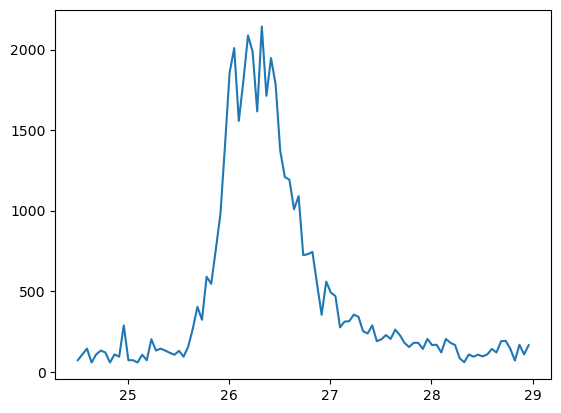

In [3]:
plt.plot(timeseries[0], timeseries[1])

In [4]:
pmodel = models.define_model_skew(
    time=timeseries[0],
    intensity=timeseries[1]
)
idata = pl.sampling(pmodel, tune=6000, draws=2000)
idata = pl.posterior_predictive_sampling(pmodel, idata)
summary = az.summary(idata, var_names=["~y", "~baseline", "offset"])
summary

c:\Users\joche\miniconda3\envs\pp_env\lib\site-packages\pymc\data.py:287: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Sampling: [L, alpha, area, baseline_intercept, baseline_slope, mean, noise, std]


Progress,Draws,Divergences,Step Size,Gradients/Draw
,8000,0,0.62,3
,8000,0,0.62,3
,8000,0,0.60,7
,8000,0,0.63,7


Sampling: [L]


Output()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
baseline_intercept,-43.978,7.255,-57.960,-30.508,0.079,0.056,8511.0,6241.0,1.0
baseline_slope,6.657,0.513,5.757,7.675,0.006,0.004,6862.0,5687.0,1.0
noise_log__,4.638,0.072,4.509,4.778,0.001,0.001,9353.0,5750.0,1.0
mean,25.949,0.013,25.924,25.972,0.000,0.000,2928.0,3445.0,1.0
std_log__,-0.643,0.041,-0.722,-0.570,0.001,0.001,2733.0,3353.0,1.0
alpha,2.963,0.396,2.210,3.674,0.007,0.005,3023.0,3830.0,1.0
area_log__,7.321,0.025,7.274,7.368,0.000,0.000,5421.0,5390.0,1.0
noise,103.654,7.525,90.303,118.270,0.078,0.056,9353.0,5750.0,1.0
std,0.526,0.021,0.486,0.565,0.000,0.000,2733.0,3353.0,1.0
area,1512.656,37.424,1442.853,1584.455,0.508,0.360,5421.0,5390.0,1.0


C:\Users\joche\AppData\Local\Temp\ipykernel_5868\1943866237.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


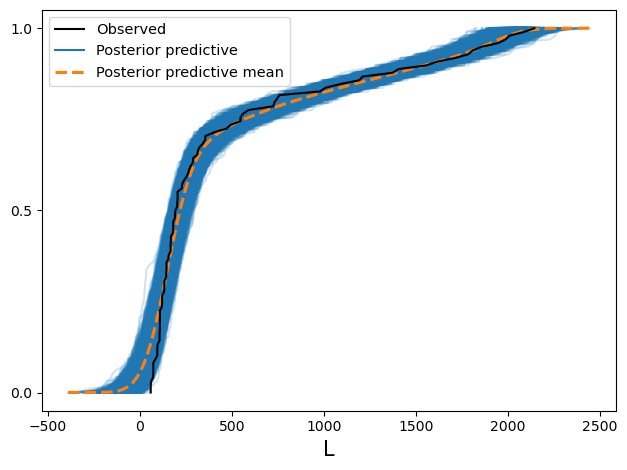

In [5]:
axs = az.plot_ppc(
    idata,
    # data_pairs={"L":"L"},
    var_names=["L"],
    kind="cumulative",
    # backend_kwargs=dict(sharey=True),
)
fig = plt.gcf()
plt.tight_layout()

In [6]:
plots.plot_posterior_predictive(
    identifier="peak_fit_skew_normal",
    time=timeseries[0],
    intensity=timeseries[1],
    path=path_result,
    idata=idata,
    discarded=False,
)

plots.plot_posterior(
    identifier="peak_fit_skew_normal",
    time=timeseries[0],
    intensity=timeseries[1],
    path=path_result,
    idata=idata,
    discarded=False,
)

## Exemplary result with a double peak

In [7]:
path_result = Path("./paper raw data")
path_d = Path("./paper raw data/exemplary results raw data/A2t2R1Part1_132_85.9_86.1.npy")
timeseries_d = np.load(path_d)

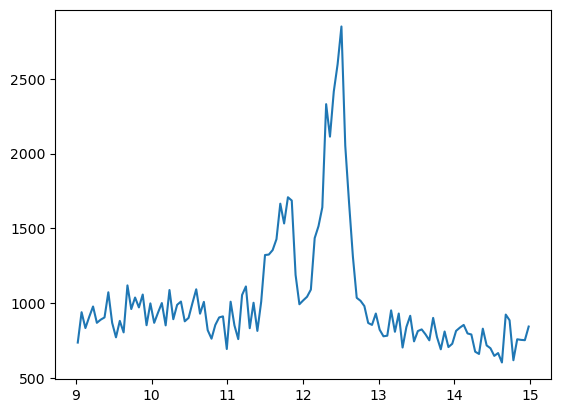

In [8]:
plt.plot(timeseries_d[0], timeseries_d[1])

In [9]:
pmodel_d = models.define_model_double_normal(
    time=timeseries_d[0],
    intensity=timeseries_d[1]
)
idata_d = pl.sampling(pmodel_d, tune=12000, draws=2000)
idata_d = pl.posterior_predictive_sampling(pmodel_d, idata_d)
summary_d = az.summary(idata_d, var_names=["~y", "~baseline", "offset"])
summary_d

c:\Users\joche\miniconda3\envs\pp_env\lib\site-packages\pymc\data.py:287: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Sampling: [L, baseline_intercept, baseline_slope, height, meanmean, noise, separation, std]


Progress,Draws,Divergences,Step Size,Gradients/Draw
,14000,0,0.55,15
,14000,0,0.54,15
,14000,0,0.52,15
,14000,0,0.49,15


Sampling: [L]


Output()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
baseline_intercept,1116.578,38.645,1041.890,1188.558,0.738,0.523,2743.0,3418.0,1.0
baseline_slope,-21.756,3.070,-27.447,-15.806,0.059,0.042,2712.0,3492.0,1.0
noise_log__,4.773,0.067,4.646,4.894,0.001,0.001,8809.0,5963.0,1.0
std_log__[0],-1.813,0.108,-2.012,-1.611,0.001,0.001,7129.0,5764.0,1.0
std_log__[1],-1.879,0.044,-1.963,-1.798,0.001,0.000,7303.0,6430.0,1.0
height_log__[0],6.650,0.085,6.493,6.812,0.001,0.001,7345.0,5516.0,1.0
height_log__[1],7.474,0.037,7.405,7.544,0.000,0.000,7762.0,6293.0,1.0
meanmean,12.082,0.008,12.066,12.098,0.000,0.000,6577.0,5571.0,1.0
separation_log__,-0.354,0.023,-0.397,-0.312,0.000,0.000,6911.0,5108.0,1.0
noise,118.513,7.938,104.088,133.441,0.084,0.059,8809.0,5963.0,1.0


C:\Users\joche\AppData\Local\Temp\ipykernel_5868\1105783876.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\joche\miniconda3\envs\pp_env\lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\joche\miniconda3\envs\pp_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


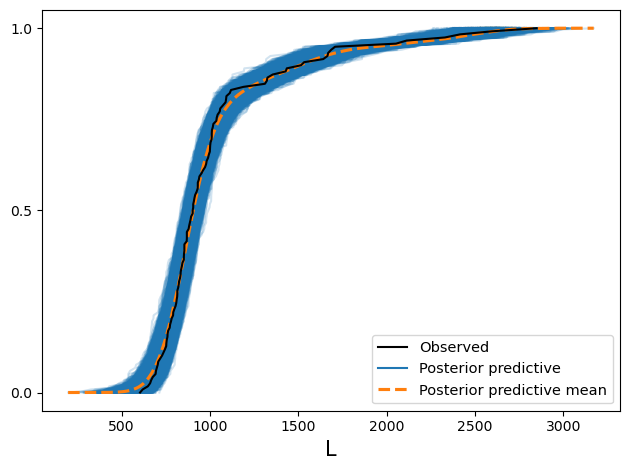

In [10]:
axs = az.plot_ppc(
    idata_d,
    # data_pairs={"L":"L"},
    var_names=["L"],
    kind="cumulative",
    # backend_kwargs=dict(sharey=True),
)
fig = plt.gcf()
plt.tight_layout()

In [11]:
plots.plot_posterior_predictive(
    identifier="peak_fit_double_normal",
    time=timeseries_d[0],
    intensity=timeseries_d[1],
    path=path_result,
    idata=idata_d,
    discarded=False,
)

plots.plot_posterior(
    identifier="peak_fit_double_normal",
    time=timeseries_d[0],
    intensity=timeseries_d[1],
    path=path_result,
    idata=idata_d,
    discarded=False,
)

In [13]:
%load_ext watermark
%watermark -idu

Last updated: 2024-10-13T15:50:13.319852+02:00

